# Chapter 10 音声データの特徴量

## 2.1
> soxを利用して, 実際に音声を収録し, 本章で紹介したPythonコードにより処理を行ってみよ.

`sox -d -r 16000 -c 1 -b 16 -t wav chapter10/speech.wav`

`sox -d -r 16000 -c 1 -b 16 -t wav chapter10/silence.wav`

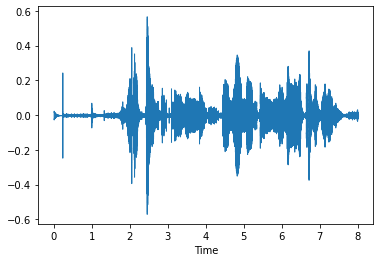

In [2]:
# list 2.1
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

pcm_data, sampling_rate = librosa.load("speech.wav", sr=16000)
librosa.display.waveshow(pcm_data, sr=sampling_rate)
plt.show()

## 2.2
> プログラムその6において, $\Delta$特徴量や$\Delta\Delta$特徴量を計算する際に, 乗法性歪を除去する前の対数メルスペクトルを使用した. 除去後のものを使った場合と差はあるだろうか.

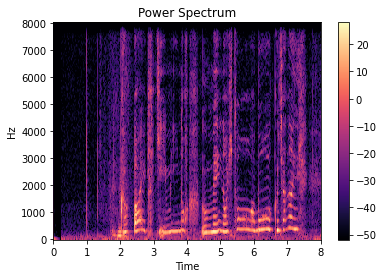

In [3]:
# list 2.2
num_bins = 256
frame_shift = int(0.01*sampling_rate)
frame_size = int(0.02*sampling_rate)
power_spectrum = np.abs(librosa.stft(pcm_data, n_fft=num_bins*2, win_length=frame_size, hop_length=frame_shift))**2
log_spectrum = librosa.power_to_db(power_spectrum)
librosa.display.specshow(log_spectrum, sr=sampling_rate, hop_length=frame_shift, x_axis="time", y_axis="hz")
plt.title("Power Spectrum")
plt.colorbar()
plt.show()

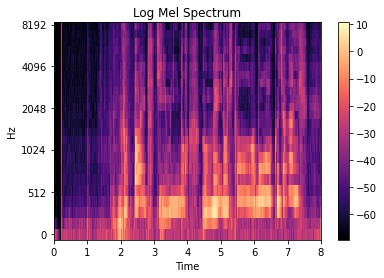

In [4]:
# list 2.3
mel_filter_bank = librosa.filters.mel(sr=sampling_rate, n_fft=num_bins*2, n_mels=24, htk=True)
mel_spectrum = np.dot(mel_filter_bank, power_spectrum)
log_mel_spectrum = librosa.power_to_db(mel_spectrum)
librosa.display.specshow(log_mel_spectrum, sr=sampling_rate, hop_length=frame_shift, x_axis="time", y_axis="mel")
plt.title("Log Mel Spectrum")
plt.colorbar()
plt.show()

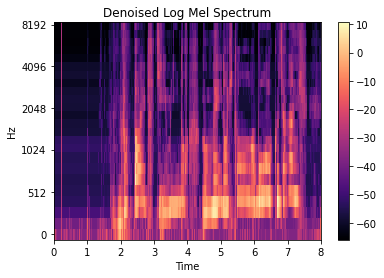

In [5]:
# list 2.4
pcm_data_noise, sampling_rate = librosa.load("silence.wav", sr=16000)
power_spectrum_noise = np.abs(librosa.stft(pcm_data_noise, n_fft=num_bins*2, win_length=frame_size, hop_length=frame_shift))**2
power_spectrum_noise_mean = np.mean(power_spectrum_noise, axis=1)

num_dims, num_frames = power_spectrum.shape
power_spectrum_clean = power_spectrum
floor = 0.1
for j in range(0, num_dims):
    for t in range(0, num_frames):
        power_spectrum_clean[j, t] = max(power_spectrum[j, t] - power_spectrum_noise_mean[j], floor*power_spectrum_noise_mean[j]) 

mel_spectrum_clean = np.dot(mel_filter_bank, power_spectrum_clean)
log_mel_spectrum_clean = librosa.power_to_db(mel_spectrum_clean)
librosa.display.specshow(log_mel_spectrum_clean, sr=sampling_rate, hop_length=frame_shift, x_axis="time", y_axis="mel")
plt.title("Denoised Log Mel Spectrum")
plt.colorbar()
plt.show()

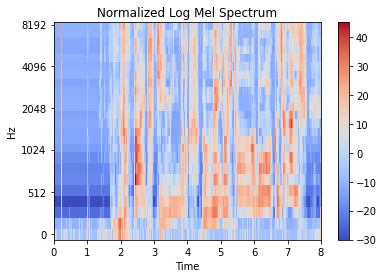

In [6]:
# list 2.5
log_mel_spectrum_clean_mean = np.mean(log_mel_spectrum_clean, axis=1)
num_dims, num_frames = log_mel_spectrum_clean.shape
log_mel_spectrum_clean_norm = log_mel_spectrum_clean
floor = 0.1
for j in range(0, num_dims):
    for t in range(0, num_frames):
        log_mel_spectrum_clean_norm[j, t] = log_mel_spectrum_clean[j, t] - log_mel_spectrum_clean_mean[j] 

librosa.display.specshow(log_mel_spectrum_clean_norm, sr=sampling_rate, hop_length=frame_shift, x_axis="time", y_axis="mel")
plt.title("Normalized Log Mel Spectrum")
plt.colorbar()
plt.show()

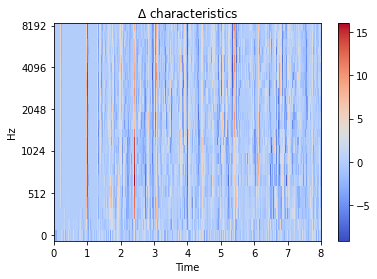

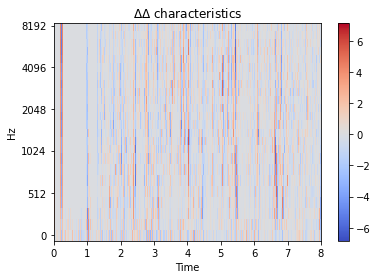

In [7]:
# list 2.6
D_log_mel_spectrum_clean = librosa.feature.delta(log_mel_spectrum_clean, width=5, order=1)
librosa.display.specshow(D_log_mel_spectrum_clean, sr=sampling_rate, hop_length=frame_shift, x_axis="time", y_axis="mel")
plt.title("$\Delta$ characteristics")
plt.colorbar()
plt.show()

DD_log_mel_spectrum_clean = librosa.feature.delta(log_mel_spectrum_clean, width=7, order=2)
librosa.display.specshow(DD_log_mel_spectrum_clean, sr=sampling_rate, hop_length=frame_shift, x_axis="time", y_axis="mel")
plt.title("$\Delta\Delta$ characteristics")
plt.colorbar()
plt.show()

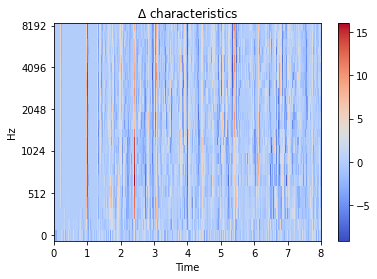

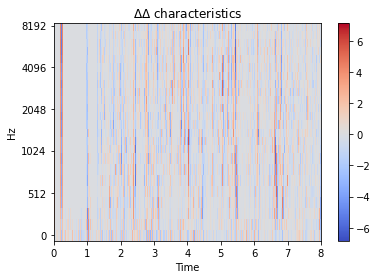

In [8]:
# problem 2.2
D_log_mel_spectrum_clean = librosa.feature.delta(log_mel_spectrum_clean_norm, width=5, order=1)
librosa.display.specshow(D_log_mel_spectrum_clean, sr=sampling_rate, hop_length=frame_shift, x_axis="time", y_axis="mel")
plt.title("$\Delta$ characteristics")
plt.colorbar()
plt.show()

DD_log_mel_spectrum_clean = librosa.feature.delta(log_mel_spectrum_clean_norm, width=7, order=2)
librosa.display.specshow(DD_log_mel_spectrum_clean, sr=sampling_rate, hop_length=frame_shift, x_axis="time", y_axis="mel")
plt.title("$\Delta\Delta$ characteristics")
plt.colorbar()
plt.show()